In [1]:
import pandas as pd
import numpy as np
import re

from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords

In [2]:
train=pd.read_csv('Data/train.csv')

In [3]:
train

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1


In [4]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [5]:
#Create a function to clean tweets
def cleanText(text):
    text=str(text)  #Coverts Text to String
    text=re.sub(r'@[A-Za-z0-9]+','',text)  #Removing @Mentions
    text = re.sub(r'#[\w]*sxsw[\w]*', ' ', text,flags=re.I)  #Removing sxsw hashtag
    text=re.sub(r'#','',text)  #Removing # Symbols
    text=re.sub(r'RT[\s]+','',text)  #Removing ReTweets
    text=re.sub(r'https?:\/\/\s+','',text)  #Removing the hyperlinks
    text=re.sub(r'bit.ly[/\.\w]+','',text)  #Removing the shortlinks 
    text=text.replace(r'{html}',"") 
    cleanr = re.compile(r'<.*?>')
    text = re.sub(cleanr, '', text)
    text = re.sub(r'[0-9]+', '', text)  #Removing Numbers
    text = re.sub(r'[^A-Za-z]+', ' ', text)  #Removing all spacial character
    text = text.lower()  #Coverts Text To Lower Case
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text) 
    filtered_words = [w for w in tokens if w not in stopwords.words('english')]
#     stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

In [6]:
#Cleaning the tweets
train['cleanText']=train['tweet'].map(lambda s:cleanText(s))

In [7]:
train

,tweet_id,tweet,sentiment,cleanText
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,apple defining language touch different dialec...
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny a...
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr quot apple school...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone app would b pretty awesome crash every ...
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...
...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,google plze tammi middle craziness everything ...
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,set link edchat musedchat newtwitter
7271,5378,RT @mention Aha! Found proof of lactation room...,1,aha found proof lactation room excuse quot mot...
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,launched ipad app get detail first edition fre...


## Subjectivity and Polarity

In [8]:
#Create a function to get the Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create 2 new columns
train['Subjectivity']=train['cleanText'].apply(getSubjectivity)
train['Polarity']=train['cleanText'].apply(getPolarity)

In [9]:
train

,tweet_id,tweet,sentiment,cleanText,Subjectivity,Polarity
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,apple defining language touch different dialec...,0.650000,0.150000
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny a...,0.893750,0.381250
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr quot apple school...,0.000000,0.000000
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone app would b pretty awesome crash every ...,1.000000,0.625000
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...,0.252273,0.068182
...,...,...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,google plze tammi middle craziness everything ...,0.150000,0.050000
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,set link edchat musedchat newtwitter,0.000000,0.000000
7271,5378,RT @mention Aha! Found proof of lactation room...,1,aha found proof lactation room excuse quot mot...,0.058333,-0.025000
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,launched ipad app get detail first edition fre...,0.566667,0.325000


## EDA

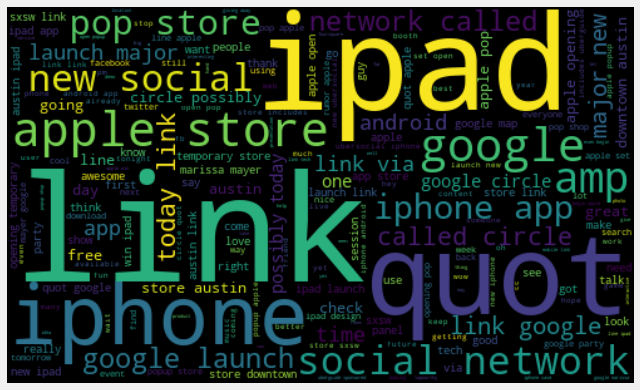

In [10]:
#Plot the WordCloud
plt.figure(figsize=(10,15))
allWords=' '.join([twts for twts in train['cleanText']])
wordCloud= WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

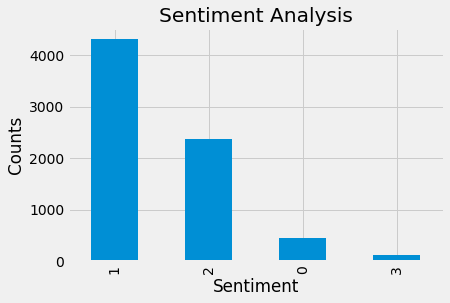

In [11]:
#Plot the Analysis Results
train['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

# Handling Cant Tell Analysis

In [12]:
train

,tweet_id,tweet,sentiment,cleanText,Subjectivity,Polarity
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,apple defining language touch different dialec...,0.650000,0.150000
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny a...,0.893750,0.381250
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr quot apple school...,0.000000,0.000000
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone app would b pretty awesome crash every ...,1.000000,0.625000
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...,0.252273,0.068182
...,...,...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,google plze tammi middle craziness everything ...,0.150000,0.050000
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,set link edchat musedchat newtwitter,0.000000,0.000000
7271,5378,RT @mention Aha! Found proof of lactation room...,1,aha found proof lactation room excuse quot mot...,0.058333,-0.025000
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,launched ipad app get detail first edition fre...,0.566667,0.325000


In [13]:
CantTellTweets=train[train['sentiment']==3]
CantTellTweets

,tweet_id,tweet,sentiment,cleanText,Subjectivity,Polarity
10,6398,RT @mention Official #SXSW App Û÷SXSW GOÛª b...,3,official app sxsw go android iphone ipad,0.000,0.000
28,5368,standing on a long line surrounded by unemploy...,3,standing long line surrounded unemployed techi...,0.400,-0.050
123,4618,Google/Bing search smackdown panel is in a gia...,3,google bing search smackdown panel giant room ...,0.750,0.000
133,7469,Original products for 1 device is nuts. #sxsw....,3,original product device nut eg ipad,0.750,0.375
242,2116,iPhone crashed in front of #sxsw Apple pop-up....,3,iphone crashed front apple pop bestworstthingever,0.000,0.000
...,...,...,...,...,...,...
7041,3941,need to give my iPhone &amp; liver a rest. #SXSW,3,need give iphone amp liver rest,0.000,0.000
7121,6486,RT @mention RT @mention @mention @mention Aust...,3,austin street closure sxsw google map form lin...,0.000,0.000
7164,2547,Thank goodness for these two hour breaks where...,3,thank goodness two hour break turn iphone batt...,0.000,0.000
7228,8613,Google actually does have an official death po...,3,google actually official death policy one via ...,0.100,0.000


In [14]:
#Create a function to compute the negative, neutral and positive for CantTell analysis
def cantTellGetAnalysis(score):
    if score<0:
        return 0
    if score==0:
        return 1
    else:
        return 2

CantTellTweets['sentiment']=CantTellTweets['Polarity'].apply(cantTellGetAnalysis)
CantTellTweets

/home/kalpesh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,tweet_id,tweet,sentiment,cleanText,Subjectivity,Polarity
10,6398,RT @mention Official #SXSW App Û÷SXSW GOÛª b...,1,official app sxsw go android iphone ipad,0.000,0.000
28,5368,standing on a long line surrounded by unemploy...,0,standing long line surrounded unemployed techi...,0.400,-0.050
123,4618,Google/Bing search smackdown panel is in a gia...,1,google bing search smackdown panel giant room ...,0.750,0.000
133,7469,Original products for 1 device is nuts. #sxsw....,2,original product device nut eg ipad,0.750,0.375
242,2116,iPhone crashed in front of #sxsw Apple pop-up....,1,iphone crashed front apple pop bestworstthingever,0.000,0.000
...,...,...,...,...,...,...
7041,3941,need to give my iPhone &amp; liver a rest. #SXSW,1,need give iphone amp liver rest,0.000,0.000
7121,6486,RT @mention RT @mention @mention @mention Aust...,1,austin street closure sxsw google map form lin...,0.000,0.000
7164,2547,Thank goodness for these two hour breaks where...,1,thank goodness two hour break turn iphone batt...,0.000,0.000
7228,8613,Google actually does have an official death po...,1,google actually official death policy one via ...,0.100,0.000


In [15]:
train_data=train.copy()
train_data=train_data[(train_data['sentiment']==0)|(train_data['sentiment']==1)|(train_data['sentiment']==2)]
train_data

,tweet_id,tweet,sentiment,cleanText,Subjectivity,Polarity
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,apple defining language touch different dialec...,0.650000,0.150000
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny a...,0.893750,0.381250
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr quot apple school...,0.000000,0.000000
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone app would b pretty awesome crash every ...,1.000000,0.625000
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...,0.252273,0.068182
...,...,...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,google plze tammi middle craziness everything ...,0.150000,0.050000
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,set link edchat musedchat newtwitter,0.000000,0.000000
7271,5378,RT @mention Aha! Found proof of lactation room...,1,aha found proof lactation room excuse quot mot...,0.058333,-0.025000
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,launched ipad app get detail first edition fre...,0.566667,0.325000


In [16]:
#Concat both DataFrames
data=pd.concat([train_data,CantTellTweets])
data

,tweet_id,tweet,sentiment,cleanText,Subjectivity,Polarity
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,apple defining language touch different dialec...,0.650000,0.150000
1,1851,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny a...,0.893750,0.381250
2,2689,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr quot apple school...,0.000000,0.000000
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,iphone app would b pretty awesome crash every ...,1.000000,0.625000
4,3604,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...,0.252273,0.068182
...,...,...,...,...,...,...
7041,3941,need to give my iPhone &amp; liver a rest. #SXSW,1,need give iphone amp liver rest,0.000000,0.000000
7121,6486,RT @mention RT @mention @mention @mention Aust...,1,austin street closure sxsw google map form lin...,0.000000,0.000000
7164,2547,Thank goodness for these two hour breaks where...,1,thank goodness two hour break turn iphone batt...,0.000000,0.000000
7228,8613,Google actually does have an official death po...,1,google actually official death policy one via ...,0.100000,0.000000


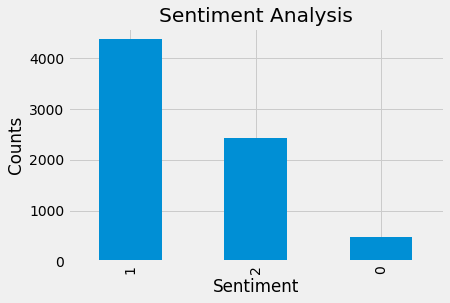

In [18]:
#Plot the Analysis Results
data['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [19]:
# data[['tweet_id','cleanText','sentiment']].to_csv('Data/clean_data.csv',index=False)

## Model Selection

Results before handling CantTell Analysis

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV

In [20]:
tfidf_vectorizer_raw = TfidfVectorizer(max_df=0.90, ngram_range=(1,3), min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer_raw.fit_transform(train['cleanText'])

In [21]:
X_train,X_test,y_train,y_test=train_test_split(tfidf,train['sentiment'],test_size=0.25,random_state=0)

In [22]:
#Logistic Regression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6191470796315588

In [23]:
#RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='gini')
randomclassifier.fit(X_train,y_train)
y_pred=randomclassifier.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6285494717225143

### Results After handling CantTell Analysis

In [53]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, ngram_range=(1,3), min_df=2, max_features=1500, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['cleanText'])

In [54]:
X_train,X_test,y_train,y_test=train_test_split(tfidf,data['sentiment'],test_size=0.25,random_state=0)

In [55]:
#Logistic Regression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6396384035090452

In [56]:
#RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='gini')
randomclassifier.fit(X_train,y_train)
y_pred=randomclassifier.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6504859612019074

## Hyperparameter Tuning

In [28]:
# # Applying Grid Search to find the best model and the best parameters
# parameters ={
#     'n_estimators': [100, 200, 300, 500,700], 
#     'criterion': ['gini','entropy'], 
#     'bootstrap': [True,False],
#     'min_samples_split':[0,1,2,3],
#     'min_samples_leaf':[0.0,1,2,3]
# }
# grid_search = GridSearchCV(estimator = randomclassifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)

In [60]:
import pandas as pd
import numpy as np

import re
from textblob import TextBlob
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

lemmatizer = WordNetLemmatizer()
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.90,
    ngram_range=(1,3), 
    min_df=2, 
    max_features=1500, 
    stop_words='english'
    )
rf=RandomForestClassifier(
    n_estimators=200,
    criterion='gini'
    )

data=pd.read_csv('Data/clean_data.csv')

tfidf_data=tfidf_vectorizer.fit_transform(data['cleanText'].apply(lambda x: np.str_(x)))

X_train,X_test,y_train,y_test=train_test_split(tfidf_data,data['sentiment'],test_size=0.3,random_state=0)

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print(f1_score(y_test,y_pred,average='weighted'))

0.649037722746602


In [62]:
# 0.6460183820686497
import joblib

In [65]:
data=pd.read_csv('Data/test.csv')
data['cleanText']=data['tweet'].map(lambda s:cleanText(s))
tfidf_model=joblib.load('Model/tfidf_1.sav')
data_tfidf=tfidf_model.transform(data['cleanText'])
model=joblib.load('Model/rf_model_1.sav')
y_pred=model.predict(data_tfidf)
print(f'id : {len(data)}\npredict : {len(y_pred)}')
output=pd.concat([data['tweet_id'],pd.DataFrame(y_pred)],axis=1,names=['tweet_id','sentiment'])
output.to_csv('Data/sub_file.csv',index=False)

id : 1819
predict : 1819
